In [5]:
import json
import os
from matplotlib import pyplot as plt
%matplotlib inline

Unpack archive with experiments `provence_exps.zip`: https://drive.google.com/file/d/1hjcoCUniGS5bjF7xZYzi8s1HXJOdJwWL/view?usp=sharing (1.3G)

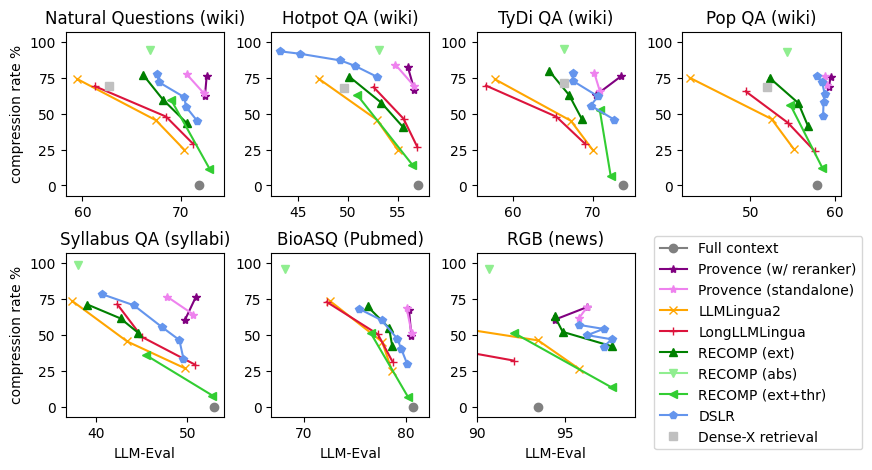

In [4]:
dd = "provence_exps/" # insert link to an unzipped folder with experiments
models = {
          "Full context": ["full"],
          "Provence (w/ reranker)": ["provence_rerank_0.1", "provence_rerank_0.5"],
          "Provence (standalone)":  ["provence_standalone_0.1", "provence_standalone_0.5"],
          "LLMLingua2": ["llmlingua2_0.25", "llmlingua2_0.5", "llmlingua2_0.7"],
          "LongLLMLingua": ["longllmlingua_0.25", "longllmlingua_0.5", "longllmlingua_0.7"],
          "RECOMP (ext)": ["recomp_ext_top3", "recomp_ext_top2", "recomp_ext_top1"],
          "RECOMP (abs)": ["recomp_abs"],
          "RECOMP (ext+thr)": ["recomp_ext_t50", "recomp_ext_t30"],
          "DSLR": ["dslr_ce_deb_t01", "dslr_ce_deb_t02", "dslr_ce_deb_t05", "dslr_ce_deb_t07", "dslr_ce_deb_t09", "dslr_ce_deb_t095"],
          "Dense-X retrieval": ["default_factoid_full"], 
         }
colors = {
          "No RAG": ["black", "o-"],
          "LLMLingua2": ["orange", "x-"],
          "LongLLMLingua": ["crimson", "+-"],
          "RECOMP (ext)": ["green", "^-"],
          "RECOMP (ext+thr)": ["limegreen", "<-"],
          "RECOMP (abs)": ["lightgreen", "v-"],
          "DSLR": ["cornflowerblue", "p-"],
          "Dense-X retrieval": ["silver", "s"],
          "Full context": ["gray", "o-"],
          "Provence (w/ reranker)": ["purple", "*-"],
          "Provence (standalone)": ["violet", "*-"],
         }
datasets = ["nq_castorini_6-3", "hotpotqa_castorini_6-3", "tydiqa_castorini_6-3", "popqa_castorini_6-3", "syllabusQA", "pubmed_bioasq11b_ragged", "rgb"]
dnames = ["Natural Questions (wiki)", "Hotpot QA (wiki)", "TyDi QA (wiki)", "Pop QA (wiki)", "Syllabus QA (syllabi)", "BioASQ (Pubmed)", "RGB (news)", "ApiBench (TF docs)"]
res = {dataset:[] for dataset in datasets}
metric = "LLMeval"
metricname = "LLM-Eval"
#metric = "Recall"
#metricname = "Recall"
for dataset in datasets:
    res_ = {}
    for key in models:
        models_ = models[key]
        res__ = []
        for model in models_:
            f = f"{dd}/{dataset}_{model}/eval_dev_metrics.json"
            if os.path.isfile(f):
                v = float(json.load(open(f))[metric]) * 100
                f = f"{dd}/{dataset}_{model}/eval_dev_context_compression.json"
                if os.path.isfile(f):
                    v2 = float(json.load(open(f))["compression"])
                else:
                    v2 = 0 # full
                res__.append((model, v, v2))
        res_[key]  = res__
    res[dataset] = res_

fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(2, 4)
for di, (dataset, datasetname) in enumerate(zip(datasets, dnames)):
    if di != 3: 
        fig.add_subplot(gs[di//4, di%4])
    else:
        fig.add_subplot(gs[0:1, 3])
    xmin, xmax, ymin, ymax = 1000, -1000, 1000, -1000
    for label in res[dataset]:
        res__ = res[dataset][label]
        xs = [item[1] for item in res__]
        ys = [item[2] for item in res__]
        labels = [item[0] for item in res__]
        if xs: 
            xmin = min(xmin, min(xs))
            xmax = max(xmax, max(xs))
        if ys:
            ymin = min(ymin, min(ys))
            ymax = max(ymax, max(ys))
        if len(xs):
            color, marker = colors[label]
            plt.plot(xs, ys, marker, c=color, label=label)
    if di == 3: plt.legend(loc=(-0.18, -1.55))
    if dataset == "rgb":
        plt.xlim(90, 99)
    elif dataset == "popqa":
        plt.xlim(50, 60)
    else:
        plt.xlim(xmin*0.98, xmax*1.02)
    plt.ylim(-7, 107)
    if di >= 4: plt.xlabel(metricname)
    if di % 4 == 0: plt.ylabel("compression rate %")
    plt.title(datasetname)
plt.subplots_adjust(
                    hspace=0.35, 
                    wspace=0.3,
                    )